In [ ]:
# Johan Trippitelli - StudentID: 260917958
# Christopher Chong, StudentID: 260976714
# Minh Anh Trinh, StudentID: 260853143


import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose, Lambda


# downloads the two datasets into the colab root directory
torchvision.datasets.FashionMNIST( root='./', download=True)
torchvision.datasets.CIFAR10(root='./', download=True)



100%|██████████| 26421880/26421880 [00:01<00:00, 13319967.50it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207846.24it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3876142.45it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21854531.37it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 170498071/170498071 [00:03<00:00, 49113786.03it/s]


Extracting ./cifar-10-python.tar.gz to ./


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train

In [ ]:
# Data Preprocessing + Normalization for Data

import numpy as np
# after downloaded datasets, moves into data objects that we can normalize then use

# without normalize, the values range from 0 to 1
# with normalize, values range from -1 to 1

# with flatten, the individual tensors are 1 x 781 instead of 28 x 28 as they would be if they were unflattened


# since in the rubric it states "you can use existing machine learning libraries (such as PyTorch) to load the dataset, and should use the default train and test partitions", we use pytorch to
# load the dataset and vectorize/normalize the data as is shown in the pytorch tutorial under "Data Utilities section" in "Pytorch Ingredients"
transformer=Compose([ToTensor(),Normalize((0.5), (0.5)),Lambda(lambda tensor: torch.flatten(tensor))])

transformer_cifar=Compose([ToTensor(),Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),Lambda(lambda tensor: tensor.reshape([3072]))])


fashion_data_train = torchvision.datasets.FashionMNIST(root='./', train=True, transform=transformer) # ensures that its between -1 and 1


#fashion_data_test = torchvision.datasets.FashionMNIST(root='./', train=False, transform=transformer])


cifar_data_train = torchvision.datasets.CIFAR10(root='./', train=True, transform=transformer_cifar)
cifar_data_test = torchvision.datasets.CIFAR10(root='./', train=False, transform=transformer_cifar)

batch_size = 32

fashion_data_train_load = torch.utils.data.DataLoader(dataset=fashion_data_train,
                                           batch_size=batch_size,
                                           shuffle=True)

cifar_data_train_load = torch.utils.data.DataLoader(dataset=cifar_data_train,
                                           batch_size=batch_size,
                                           shuffle=True)


print(fashion_data_train.data.shape)
print(cifar_data_train[0])


images, labels = next(iter(fashion_data_train_load)) # flattened the tensor, so its a 1d vector instead of a 2d vector
#images = images.view(-1, 28*28)



print(images)
print(images.size())
print(labels)

#images, labels = next(iter(cifar_data_train_load)) # flattened the tensor, so its a 1d vector instead of a 2d vector
#images = images.view(-1, 28*28)



print(images)
print(images.size())
print(labels)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the Fashion MNIST dataset
fashion_data = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Extract features (images) and labels
X = fashion_data.data.numpy()  # Convert images to a NumPy array
y = fashion_data.targets.numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
class MLP:

    def __init__(self, activation_function, weight_init_method, num_hidden_layers, num_units):
        self.activation_function = activation_function
        self.weight_init_method = weight_init_method
        self.num_hidden_layers = num_hidden_layers
        self.num_units = num_units


    def one_hot(self, y):
        num_classes = len(np.unique(y))
        one_hot_encoded = []
        for label in y:
            one_hot = [0] * num_classes
            # Set the corresponding index to 1 to represent the category
            one_hot[int(label)] = 1
            one_hot_encoded.append(one_hot)
        return np.array(one_hot_encoded)

    def return_act_func(self, x):
        alpha = 0.01  # Leaky ReLU constant
        if str.lower(self.activation_function) == 'relu':
            return np.maximum(0,x)
        elif str.lower(self.activation_function) == 'leaky_relu':
            return np.where(x > 0, x, alpha * x)
        elif str.lower(self.activation_function) == 'sigmoid':
            return 1./(1.+np.exp(-x))
        elif str.lower(self.activation_function) == 'tanh':
            return np.tanh(x)

    def return_act_func_deriv(self, x):
        alpha = 0.01  # Leaky ReLU constant
        if str.lower(self.activation_function) == 'relu':
            return (x > 0) * 1.
        elif str.lower(self.activation_function) == 'leaky_relu':
            return np.where(x > 0, 1, alpha)
        elif str.lower(self.activation_function) == 'sigmoid':
            return x *(1-x)
        elif str.lower(self.activation_function) == 'tanh':
            return 1/(np.cosh(x)**2)

    def softmax(self, x):
        if len(x.shape) == 1:
            # If the input is a 1D array (vector)
            e_x = np.exp(x - np.max(x))
            return e_x / e_x.sum()
        else:
            # If the input is a 2D array (matrix), apply softmax along rows
            e_x = np.exp(x)
            return e_x / e_x.sum(axis=1, keepdims=True)

    def cross_entropy(self, y_pred, y_true):
        epsilon = 1e-15  # Small constant to prevent log(0) issues
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)


    def accuracy(self, y_pred, y_true):
        if y_true.shape != y_pred.shape:
            raise ValueError("y_pred and y_true must have the same shape.")

        # Calculate the number of correctly predicted samples
        num_correct = np.sum(np.all(y_true == y_pred, axis=1))
        return num_correct / y_true.shape[0]

    def categorize_output(self, y):
        # Find the column indices of the maximum values in each row
        max_indices = np.argmax(y, axis=1)
        # Create a new matrix with zeros, and set the maximum value positions to 1
        y_categorized = np.zeros_like(y)
        y_categorized[np.arange(len(y)), max_indices] = 1
        return y_categorized

    def initialize_layer_sizes(self, num_input_nodes, num_output_nodes):
        layer_sizes = [num_input_nodes]
        for i in range(self.num_hidden_layers):
            layer_sizes.append(self.num_units[i])
        layer_sizes.append(num_output_nodes)
        return np.array(layer_sizes)

    def initialize_hidden_layers(self, batch_size):
        hidden_layers = []
        for size in self.layer_sizes:
            hidden_layer = np.zeros((batch_size, size))
            hidden_layers.append(hidden_layer)
        return hidden_layers

    def initialize_weights(self):
        weights = list()
        for i in range(self.layer_sizes.shape[0] - 1):
            if self.weight_init_method == 'zeros':
                weight = np.zeros((self.layer_sizes[i], self.layer_sizes[i + 1]))
            elif self.weight_init_method == 'uniform':
                weight = np.random.uniform(-1, 1, size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            elif self.weight_init_method == 'gaussian':
                weight = np.random.normal(0, 1, size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            elif self.weight_init_method == 'xavier':
                weight = np.random.normal(0, np.sqrt(2 / (self.layer_sizes[i] + self.layer_sizes[i + 1])),
                                          size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            elif self.weight_init_method == 'kaiming':
                weight = np.random.normal(0, np.sqrt(2 / self.layer_sizes[i]),
                                          size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            else:
                raise ValueError("Invalid weight initialization method")

            weights.append(weight)

        return weights


    def create_batches(self, X_train, y_train, batch_size):
        n_samples = X_train.shape[0]
        num_batches = n_samples // batch_size

        X_batches = []
        y_batches = []

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            X_batches.append(X_batch)
            y_batches.append(y_batch)

        if n_samples % batch_size != 0:
            start_idx = num_batches * batch_size
            X_batch = X_train[start_idx:]
            y_batch = y_train[start_idx:]
            X_batches.append(X_batch)
            y_batches.append(y_batch)

        return X_batches, y_batches


    def feed_forward(self, X_batch):
        # Perform a forward pass of batch samples (N_samples x N_features)
        h_l = X_batch
        self.hidden_layers[0] = X_batch

        for i, w in enumerate(self.weights):
            h_l = self.return_act_func(np.dot(h_l, w))
            self.hidden_layers[i+1]=h_l
        y_pred = self.softmax(self.hidden_layers[-1])
        return y_pred

    def back_prop(self, y_pred, learning_rate, batch_size, y_batch):
        # Update the weights of the network through back-propagation
        output_error = y_pred - y_batch
        delta_t = output_error*self.return_act_func_deriv(self.hidden_layers[-1])
        for i in range(1, len(self.weights)+1):
            self.weights[-i]-= learning_rate*(self.hidden_layers[-i-1].T.dot(delta_t))/batch_size
            delta_t = self.return_act_func_deriv(self.hidden_layers[-i-1])*(delta_t.dot(self.weights[-i].T))

    def fit(self, X_train, y_train, batch_size, learning_rate=0.01, num_iterations=100):
        model_config = {
            'activation_function': self.activation_function,
            'weight_init_method': self.weight_init_method,
            'num_hidden_layers': self.num_hidden_layers,
            'num_units': self.num_units,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'num_iterations': num_iterations

        }

        # Add randomized bias values to X_train
        random_bias = np.random.rand(X_train.shape[0], 1)  # Generate random bias values for each sample
        X_train = np.concatenate((X_train, random_bias), axis=1)

        # Encode y with one-hot
        y_train = self.one_hot(y_train)

        num_input_nodes = X_train.shape[1]
        num_output_nodes = y_train.shape[1]

        self.layer_sizes = self.initialize_layer_sizes(num_input_nodes, num_output_nodes)
        self.weights = self.initialize_weights()
        train_loss_list = list()
        train_acc_list = list()

        for i in range(num_iterations):
            self.hidden_layers = self.initialize_hidden_layers(batch_size)

            # Create batches
            X_batches, y_batches = self.create_batches(X_train, y_train, batch_size)

            # Initialize evaluation metrics
            train_loss = 0
            train_acc = 0


            for X_batch, y_batch in zip(X_batches, y_batches):
                y_pred = self.feed_forward(X_batch)
                train_loss += self.cross_entropy(y_pred, y_batch)
                train_acc += self.accuracy(self.categorize_output(y_pred), y_batch)
                self.back_prop(y_pred, learning_rate, batch_size, y_batch)

            train_loss = (train_loss/len(X_batches))
            train_acc = (train_acc/len(y_batches))
            train_loss_list.append(train_loss)
            train_acc_list.append(train_acc)

            if num_iterations >= 100 and ((num_iterations >= 1000 and (i + 1) % 100 == 0) or (num_iterations < 1000 and (i + 1) % 10 == 0)) or num_iterations < 100:
                print(f"{i + 1}/{num_iterations}: loss = {train_loss.round(3)} | accuracy = {train_acc.round(3)}")

        self.plot_performance(train_loss_list, train_acc_list, model_config)

    def predict(self, X_test):
        X_test = np.concatenate((X_test,np.ones((X_test.shape[0],1))),axis=1)
        y_pred = self.categorize_output(self.feed_forward(X_test))
        return y_pred

    def evaluate_acc(self, y_pred, y_true):
        y_true = self.one_hot(y_true)
        acc = self.accuracy(y_pred, y_true)
        print(f"Accuracy: {acc}")

    def plot_performance(self, train_loss_list, train_acc_list, model_config):
        # Create a list of iteration numbers for the x-axis
        iterations = list(range(1, model_config['num_iterations'] + 1))
        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot training loss
        ax1.plot(iterations, train_loss_list, linestyle='-', label='Training Loss')
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training Loss')
        ax1.legend()

        # Plot training accuracy
        ax2.plot(iterations, train_acc_list, linestyle='-', label='Training Accuracy')
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Training Accuracy')
        ax2.legend()

        plt.tight_layout()
        plt.show()

In [ ]:
#Expirement 1
import matplotlib.pyplot as plt
testy_one_hot = mlp.one_hot(testy)


mlp = MLP(activation_function="sigmoid", weight_init_method='kaiming', num_hidden_layers=1, num_units=[128, 64])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
accuracy_kaiming = mlp.accuracy(y_pred, testy_one_hot)

mlp = MLP(activation_function="sigmoid", weight_init_method='zeros', num_hidden_layers=1, num_units=[128, 64])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
# Convert testy into one-hot encoded format
accuracy_zeros = mlp.accuracy(y_pred, testy_one_hot)

mlp = MLP(activation_function="sigmoid", weight_init_method='uniform', num_hidden_layers=1, num_units=[128, 64])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
accuracy_uniform = mlp.accuracy(y_pred, testy_one_hot)

mlp = MLP(activation_function="sigmoid", weight_init_method='gaussian', num_hidden_layers=1, num_units=[128, 64])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
accuracy_gaussian = mlp.accuracy(y_pred, testy_one_hot)

mlp = MLP(activation_function="sigmoid", weight_init_method='xavier', num_hidden_layers=1, num_units=[128, 64])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
accuracy_xavier = mlp.accuracy(y_pred, testy_one_hot)



# Lists to store the initialization methods and their corresponding accuracies
init_methods = ['Zeros', 'Uniform', 'Gaussian', 'Xavier', 'Kaiming']
accuracies = [accuracy_zeros, accuracy_uniform, accuracy_gaussian, accuracy_xavier, accuracy_kaiming]

# Creating the bar plot
plt.bar(init_methods, accuracies)
plt.xlabel('Initialization Method')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Initialization Method')
plt.ylim([0, 1])  # Assuming accuracy is between 0 and 1
plt.tight_layout()
plt.show()

In [ ]:
#Expirement 2
import matplotlib.pyplot as plt

mlp = MLP(activation_function="leaky_relu", weight_init_method='kaiming', num_hidden_layers=0, num_units=[128])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
# Convert testy into one-hot encoded format
testy_one_hot = mlp.one_hot(testy)
accuracy_0 = mlp.accuracy(y_pred, testy_one_hot)

mlp = MLP(activation_function="leaky_relu", weight_init_method='kaiming', num_hidden_layers=1, num_units=[128])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
# Convert testy into one-hot encoded format
testy_one_hot = mlp.one_hot(testy)
accuracy_2 = mlp.accuracy(y_pred, testy_one_hot)

mlp = MLP(activation_function="leaky_relu", weight_init_method='kaiming', num_hidden_layers=2, num_units=[128, 128])
mlp.fit(trainX_flat, trainy, 32)
y_pred = mlp.predict(testX_flat)
# Convert testy into one-hot encoded format
testy_one_hot = mlp.one_hot(testy)
accuracy_1 = mlp.accuracy(y_pred, testy_one_hot)

# Lists to store the depths (number of hidden layers) and their corresponding accuracies
depths = ['0 layers', '1 layer', '2 layers']
accuracies_depth = [accuracy_0, accuracy_1, accuracy_2]

# Creating the bar plot
plt.bar(depths, accuracies_depth, color=['red', 'green', 'blue'])  # Just added some colors for aesthetics
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Hidden Layers')
plt.ylim([0, 1])  # Assuming accuracy is between 0 and 1
plt.tight_layout()
plt.show()

In [ ]:
# Model for exp 3,4,5
import matplotlib.pyplot as plt
class MLP:

    def __init__(self, activation_function, weight_init_method, num_hidden_layers, num_units, reg_type=None, lambda_value=0.0):
        self.activation_function = activation_function
        self.weight_init_method = weight_init_method
        self.num_hidden_layers = num_hidden_layers
        self.num_units = num_units
        self.reg_type = reg_type
        self.lambda_value = lambda_value


    def one_hot(self, y):
        num_classes = len(np.unique(y))
        one_hot_encoded = []
        for label in y:
            one_hot = [0] * num_classes
            # Set the corresponding index to 1 to represent the category
            one_hot[int(label)] = 1
            one_hot_encoded.append(one_hot)
        return np.array(one_hot_encoded)

    def return_act_func(self, x):
        alpha = 0.01  # Leaky ReLU constant
        if str.lower(self.activation_function) == 'relu':
            return np.maximum(0,x)
        elif str.lower(self.activation_function) == 'leaky_relu':
            return np.where(x > 0, x, alpha * x)
        elif str.lower(self.activation_function) == 'sigmoid':
            return 1./(1.+np.exp(-x))
        elif str.lower(self.activation_function) == 'tanh':
            return np.tanh(x)

    def return_act_func_deriv(self, x):
        alpha = 0.01  # Leaky ReLU constant
        if str.lower(self.activation_function) == 'relu':
            return (x > 0) * 1.
        elif str.lower(self.activation_function) == 'leaky_relu':
            return np.where(x > 0, 1, alpha)
        elif str.lower(self.activation_function) == 'sigmoid':
            return x *(1-x)
        elif str.lower(self.activation_function) == 'tanh':
            return 1/(np.cosh(x)**2)

    def softmax(self, x):
        if len(x.shape) == 1:
            # If the input is a 1D array (vector)
            e_x = np.exp(x - np.max(x))
            return e_x / e_x.sum()
        else:
            # If the input is a 2D array (matrix), apply softmax along rows
            e_x = np.exp(x)
            return e_x / e_x.sum(axis=1, keepdims=True)

    def cross_entropy(self, y_pred, y_true):
        epsilon = 1e-15  # Small constant to prevent log(0) issues
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities
        loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
        if self.reg_type is not None:
            if str.lower(self.reg_type) == "l1":
                l1_penalty = np.sum([np.abs(w).sum() for w in self.weights])
                loss += self.lambda_value * l1_penalty
            if str.lower(self.reg_type) == "l2":
                l2_penalty = np.sum([np.sum(w**2) for w in self.weights])
                loss += self.lambda_value * l2_penalty
        return loss


    def accuracy(self, y_pred, y_true):
        if y_true.shape != y_pred.shape:
            raise ValueError("y_pred and y_true must have the same shape.")

        # Calculate the number of correctly predicted samples
        num_correct = np.sum(np.all(y_true == y_pred, axis=1))
        return num_correct / y_true.shape[0]

    def categorize_output(self, y):
        # Find the column indices of the maximum values in each row
        max_indices = np.argmax(y, axis=1)
        # Create a new matrix with zeros, and set the maximum value positions to 1
        y_categorized = np.zeros_like(y)
        y_categorized[np.arange(len(y)), max_indices] = 1
        return y_categorized

    def initialize_layer_sizes(self, num_input_nodes, num_output_nodes):
        layer_sizes = [num_input_nodes]
        for i in range(self.num_hidden_layers):
            layer_sizes.append(self.num_units[i])
        layer_sizes.append(num_output_nodes)
        return np.array(layer_sizes)

    def initialize_hidden_layers(self, batch_size):
        hidden_layers = []
        for size in self.layer_sizes:
            hidden_layer = np.zeros((batch_size, size))
            hidden_layers.append(hidden_layer)
        return hidden_layers

    def initialize_weights(self):
        weights = list()
        for i in range(self.layer_sizes.shape[0] - 1):
            if self.weight_init_method == 'zeros':
                weight = np.zeros((self.layer_sizes[i], self.layer_sizes[i + 1]))
            elif self.weight_init_method == 'uniform':
                weight = np.random.uniform(-1, 1, size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            elif self.weight_init_method == 'gaussian':
                weight = np.random.normal(0, 1, size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            elif self.weight_init_method == 'xavier':
                weight = np.random.normal(0, np.sqrt(2 / (self.layer_sizes[i] + self.layer_sizes[i + 1])),
                                          size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            elif self.weight_init_method == 'kaiming':
                weight = np.random.normal(0, np.sqrt(2 / self.layer_sizes[i]),
                                          size=[self.layer_sizes[i], self.layer_sizes[i + 1]])
            else:
                raise ValueError("Invalid weight initialization method")

            weights.append(weight)

        return weights


    def create_batches(self, X_train, y_train, batch_size):
        n_samples = X_train.shape[0]
        num_batches = n_samples // batch_size

        X_batches = []
        y_batches = []

        for i in range(num_batches):
            start_idx = i * batch_size
            end_idx = (i + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            X_batches.append(X_batch)
            y_batches.append(y_batch)

        if n_samples % batch_size != 0:
            start_idx = num_batches * batch_size
            X_batch = X_train[start_idx:]
            y_batch = y_train[start_idx:]
            X_batches.append(X_batch)
            y_batches.append(y_batch)

        return X_batches, y_batches


    def feed_forward(self, X_batch):
        # Perform a forward pass of batch samples (N_samples x N_features)
        h_l = X_batch
        self.hidden_layers[0] = X_batch

        for i, w in enumerate(self.weights):
            h_l = self.return_act_func(np.dot(h_l, w))
            self.hidden_layers[i+1]=h_l
        y_pred = self.softmax(self.hidden_layers[-1])
        return y_pred

    def back_prop(self, y_pred, learning_rate, batch_size, y_batch):
        # Update the weights of the network through back-propagation
        output_error = y_pred - y_batch
        delta_t = output_error*self.return_act_func_deriv(self.hidden_layers[-1])
        for i in range(1, len(self.weights)+1):
            self.weights[-i]-= learning_rate*(self.hidden_layers[-i-1].T.dot(delta_t))/batch_size
            delta_t = self.return_act_func_deriv(self.hidden_layers[-i-1])*(delta_t.dot(self.weights[-i].T))

    def fit(self, X_train, y_train, batch_size, learning_rate=0.1, num_iterations=100):
        model_config = {
            'activation_function': self.activation_function,
            'weight_init_method': self.weight_init_method,
            'num_hidden_layers': self.num_hidden_layers,
            'num_units': self.num_units,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'num_iterations': num_iterations

        }

        # Add randomized bias values to X_train
        random_bias = np.random.rand(X_train.shape[0], 1)  # Generate random bias values for each sample
        X_train = np.concatenate((X_train, random_bias), axis=1)

        # Encode y with one-hot
        y_train = self.one_hot(y_train)

        num_input_nodes = X_train.shape[1]
        num_output_nodes = y_train.shape[1]

        self.layer_sizes = self.initialize_layer_sizes(num_input_nodes, num_output_nodes)
        self.weights = self.initialize_weights()
        train_loss_list = list()
        train_acc_list = list()

        for i in range(num_iterations):
            self.hidden_layers = self.initialize_hidden_layers(batch_size)

            # Create batches
            X_batches, y_batches = self.create_batches(X_train, y_train, batch_size)

            # Initialize evaluation metrics
            train_loss = 0
            train_acc = 0


            for X_batch, y_batch in zip(X_batches, y_batches):
                y_pred = self.feed_forward(X_batch)
                train_loss += self.cross_entropy(y_pred, y_batch)
                train_acc += self.accuracy(self.categorize_output(y_pred), y_batch)
                self.back_prop(y_pred, learning_rate, batch_size, y_batch)

            train_loss = (train_loss/len(X_batches))
            train_acc = (train_acc/len(y_batches))
            train_loss_list.append(train_loss)
            train_acc_list.append(train_acc)

            if num_iterations >= 100 and ((num_iterations >= 1000 and (i + 1) % 100 == 0) or (num_iterations < 1000 and (i + 1) % 10 == 0)) or num_iterations < 100:
                print(f"{i + 1}/{num_iterations}: loss = {train_loss.round(3)} | accuracy = {train_acc.round(3)}")

        self.plot_performance(train_loss_list, train_acc_list, model_config)

    def predict(self, X_test):
        X_test = np.concatenate((X_test,np.ones((X_test.shape[0],1))),axis=1)
        y_pred = self.categorize_output(self.feed_forward(X_test))
        return y_pred

    def evaluate_acc(self, y_pred, y_true):
        y_true = self.one_hot(y_true)
        acc = self.accuracy(y_pred, y_true)
        print(f"Accuracy: {acc}")
        return acc

    def plot_performance(self, train_loss_list, train_acc_list, model_config):
        # Create a list of iteration numbers for the x-axis
        iterations = list(range(1, model_config['num_iterations'] + 1))
        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot training loss
        ax1.plot(iterations, train_loss_list, linestyle='-', label='Training Loss')
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training Loss')
        ax1.legend()

        # Plot training accuracy
        ax2.plot(iterations, train_acc_list, linestyle='-', label='Training Accuracy')
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Training Accuracy')
        ax2.legend()

        plt.tight_layout()
        plt.show()

In [ ]:
# Normalized datasets
import torch
import numpy as np
from torchvision import datasets, transforms

# Define a transform to normalize the data between -1 and 1
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training and test datasets
train_dataset = datasets.FashionMNIST(root='data/', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='data/', train=False, download=True, transform=transform)
X_train_mnist = []
y_train_mnist = []
X_test_mnist = []
y_test_mnist = []
for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    X_train_mnist.append(image.view(1, -1).numpy())
    y_train_mnist.append(label)
X_train_mnist = np.array(X_train_mnist).reshape(60000, 784)
y_train_mnist = np.array(y_train_mnist)
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    X_test_mnist.append(image.view(1, -1).numpy())
    y_test_mnist.append(label)
X_test_mnist = np.array(X_test_mnist).reshape(10000, 784)
y_test_mnist = np.array(y_test_mnist)

In [ ]:
# Unnormalized datasets
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose, Lambda
transformer_unnormalized = transforms.Compose([transforms.ToTensor()])

# Fashion MNIST
fashion_data_train_unnormalized = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transformer_unnormalized )
fashion_data_test_unnormalized = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transformer_unnormalized )


X_train_mnist_unnormalized = fashion_data_train_unnormalized.train_data.view(-1, 28*28)
y_train_mnist_unnormalized = fashion_data_train_unnormalized.train_labels
X_test_mnist_unnormalized = fashion_data_test_unnormalized.test_data.view(-1, 28*28)
y_test_mnist_unnormalized = fashion_data_test_unnormalized.test_labels

10/100: loss = 2.36 | accuracy = 0.129
20/100: loss = 2.278 | accuracy = 0.161
30/100: loss = 2.21 | accuracy = 0.203
40/100: loss = 2.15 | accuracy = 0.249
50/100: loss = 2.096 | accuracy = 0.291
60/100: loss = 2.047 | accuracy = 0.321
70/100: loss = 2.003 | accuracy = 0.346
80/100: loss = 1.962 | accuracy = 0.368
90/100: loss = 1.925 | accuracy = 0.386
100/100: loss = 1.892 | accuracy = 0.402


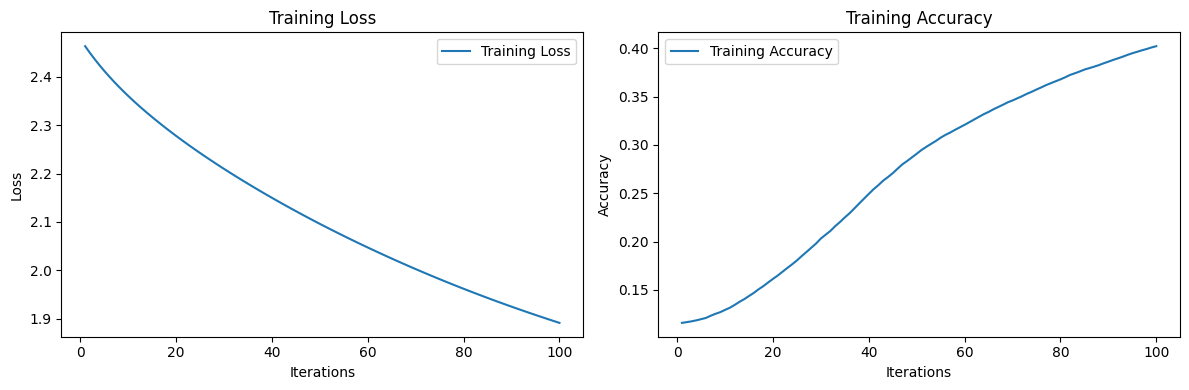

Accuracy: 0.4027
10/100: loss = 2.313 | accuracy = 0.1
20/100: loss = 2.313 | accuracy = 0.1
30/100: loss = 2.313 | accuracy = 0.1
40/100: loss = 2.313 | accuracy = 0.1
50/100: loss = 2.313 | accuracy = 0.1
60/100: loss = 2.313 | accuracy = 0.1
70/100: loss = 2.312 | accuracy = 0.1
80/100: loss = 2.312 | accuracy = 0.1
90/100: loss = 2.312 | accuracy = 0.1
100/100: loss = 2.312 | accuracy = 0.1


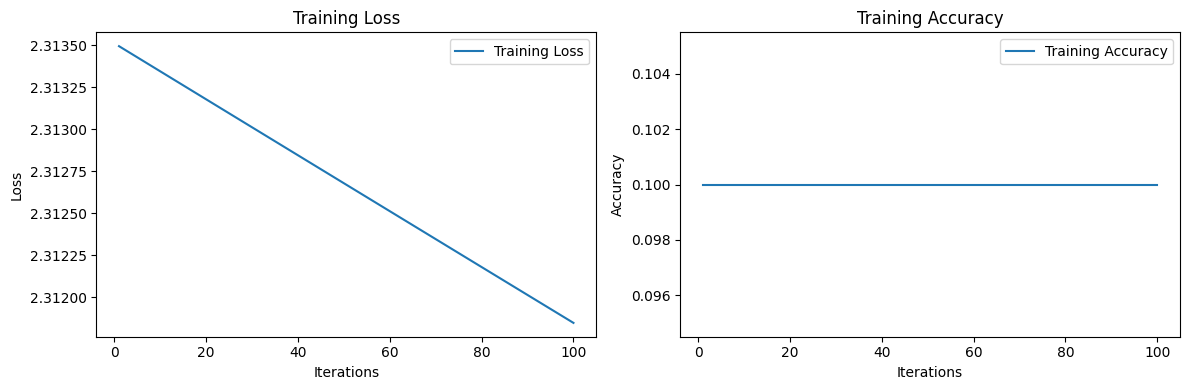

Accuracy: 0.1
10/100: loss = 2.32 | accuracy = 0.153
20/100: loss = 2.223 | accuracy = 0.2
30/100: loss = 2.13 | accuracy = 0.246
40/100: loss = 2.05 | accuracy = 0.291
50/100: loss = 1.987 | accuracy = 0.333
60/100: loss = 1.938 | accuracy = 0.374
70/100: loss = 1.898 | accuracy = 0.411
80/100: loss = 1.862 | accuracy = 0.44
90/100: loss = 1.83 | accuracy = 0.464
100/100: loss = 1.801 | accuracy = 0.486


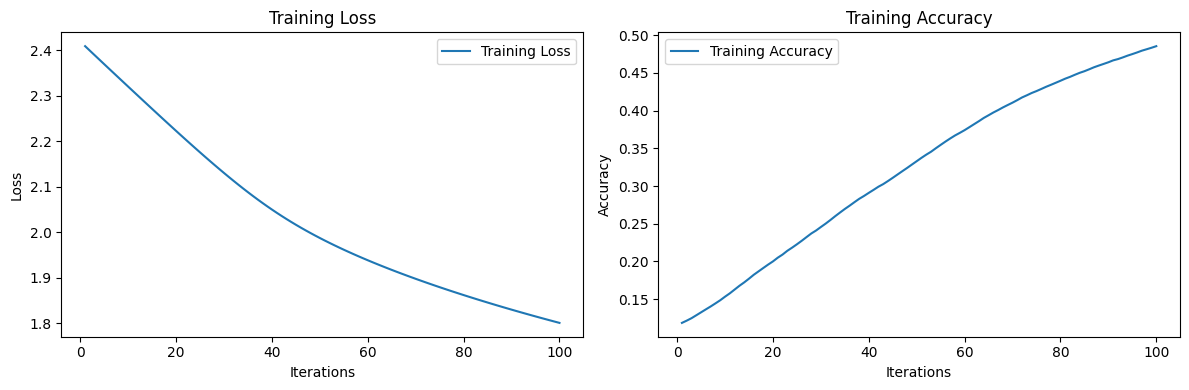

Accuracy: 0.4819


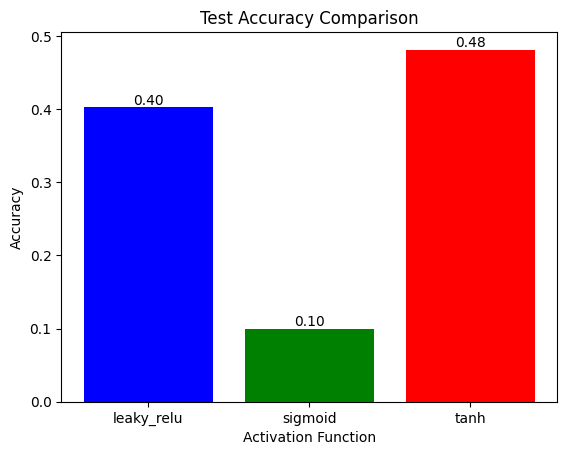

In [ ]:
# Experiment 3
activation_functions = ["leaky_relu", "sigmoid", "tanh"]
accuracies = []

for activation_function in activation_functions:
    model = MLP(activation_function, 'kaiming', num_hidden_layers=2, num_units=[128, 128])
    model.fit(X_train_mnist, y_train_mnist, batch_size=32, learning_rate=0.000001, num_iterations=100)
    # Evaluate the model on the test set
    y_pred = model.predict(X_test_mnist)
    accuracy = model.evaluate_acc(y_pred, y_test_mnist)
    accuracies.append(accuracy)

# Create a bar chart to compare accuracy
plt.bar(activation_functions, accuracies, color=['blue','green','red'])
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()

10/100: loss = 2.311 | accuracy = 0.134
20/100: loss = 2.179 | accuracy = 0.193
30/100: loss = 2.076 | accuracy = 0.253
40/100: loss = 1.987 | accuracy = 0.302
50/100: loss = 1.909 | accuracy = 0.349
60/100: loss = 1.848 | accuracy = 0.393
70/100: loss = 1.798 | accuracy = 0.43
80/100: loss = 1.758 | accuracy = 0.461
90/100: loss = 1.724 | accuracy = 0.486
100/100: loss = 1.695 | accuracy = 0.508


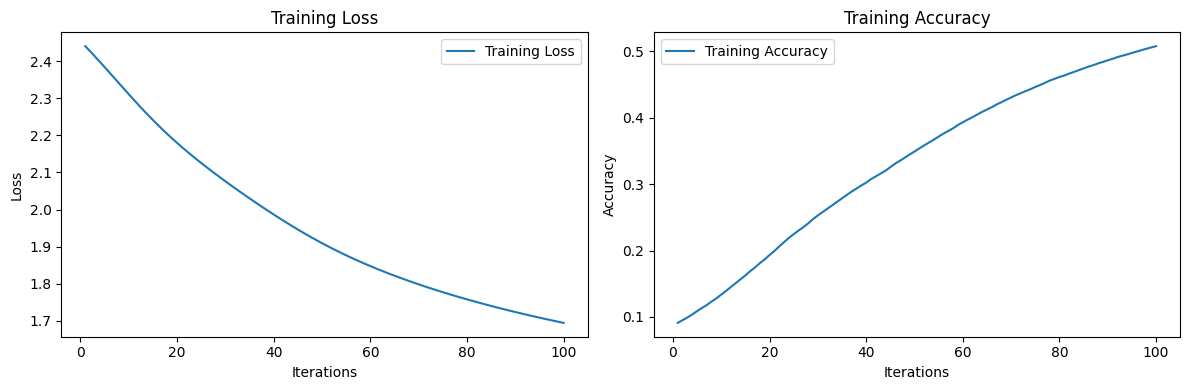

Accuracy: 0.5018
10/100: loss = 8.178 | accuracy = 0.14
20/100: loss = 8.044 | accuracy = 0.156
30/100: loss = 7.935 | accuracy = 0.181
40/100: loss = 7.855 | accuracy = 0.224
50/100: loss = 7.792 | accuracy = 0.269
60/100: loss = 7.741 | accuracy = 0.312
70/100: loss = 7.697 | accuracy = 0.353
80/100: loss = 7.66 | accuracy = 0.39
90/100: loss = 7.626 | accuracy = 0.42
100/100: loss = 7.597 | accuracy = 0.446


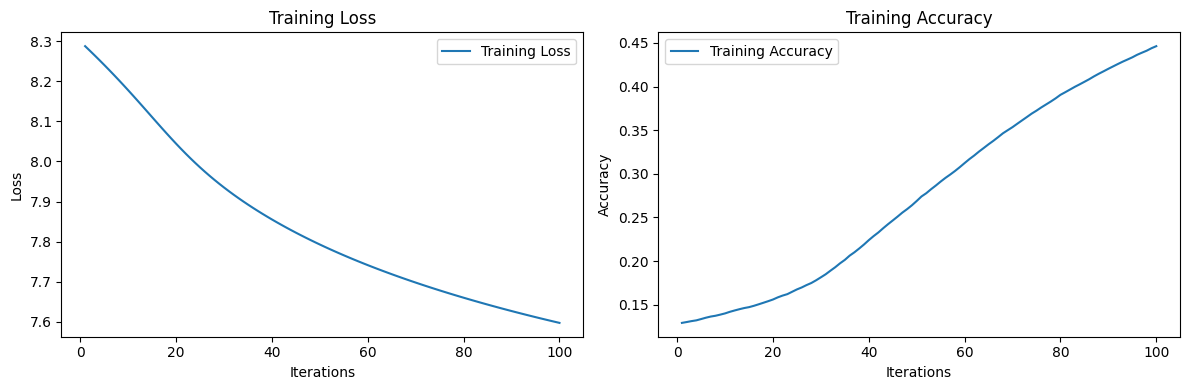

Accuracy: 0.451
10/100: loss = 2.753 | accuracy = 0.204
20/100: loss = 2.659 | accuracy = 0.243
30/100: loss = 2.571 | accuracy = 0.286
40/100: loss = 2.492 | accuracy = 0.341
50/100: loss = 2.427 | accuracy = 0.397
60/100: loss = 2.377 | accuracy = 0.447
70/100: loss = 2.337 | accuracy = 0.483
80/100: loss = 2.304 | accuracy = 0.51
90/100: loss = 2.276 | accuracy = 0.531
100/100: loss = 2.251 | accuracy = 0.547


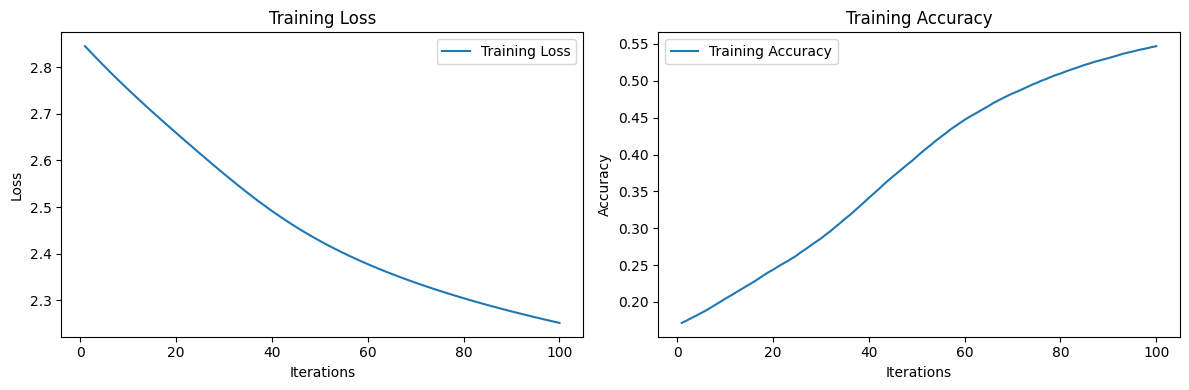

Accuracy: 0.5413


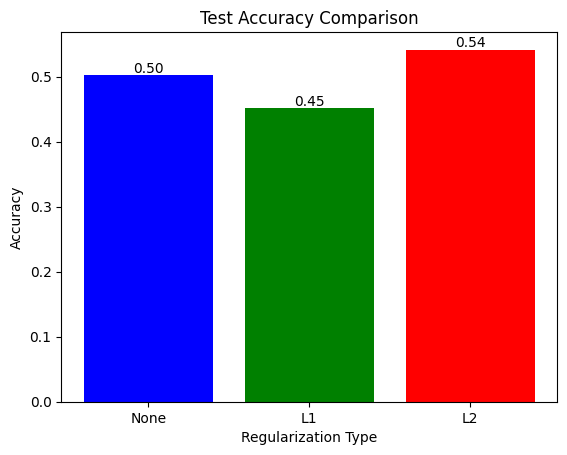

In [ ]:
# Experiment 4
reg_types = ["None", "L1", "L2"]
accuracies = []

for r in reg_types:
    model = MLP(activation_function, 'kaiming', num_hidden_layers=2, num_units=[128, 128], reg_type=r, lambda_value=0.001)
    model.fit(X_train_mnist, y_train_mnist, batch_size=32, learning_rate=0.000001, num_iterations=100)
    # Evaluate the model on the test set
    y_pred = model.predict(X_test_mnist)
    accuracy = model.evaluate_acc(y_pred, y_test_mnist)
    accuracies.append(accuracy)

# Create a bar chart to compare accuracy
plt.bar(reg_types, accuracies, color=['blue','green','red'])
plt.xlabel("Regularization Type")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()

10/100: loss = 2.346 | accuracy = 0.162
20/100: loss = 2.227 | accuracy = 0.193
30/100: loss = 2.149 | accuracy = 0.207
40/100: loss = 2.09 | accuracy = 0.22
50/100: loss = 2.042 | accuracy = 0.235
60/100: loss = 2.002 | accuracy = 0.25
70/100: loss = 1.968 | accuracy = 0.266
80/100: loss = 1.939 | accuracy = 0.279
90/100: loss = 1.913 | accuracy = 0.291
100/100: loss = 1.891 | accuracy = 0.3


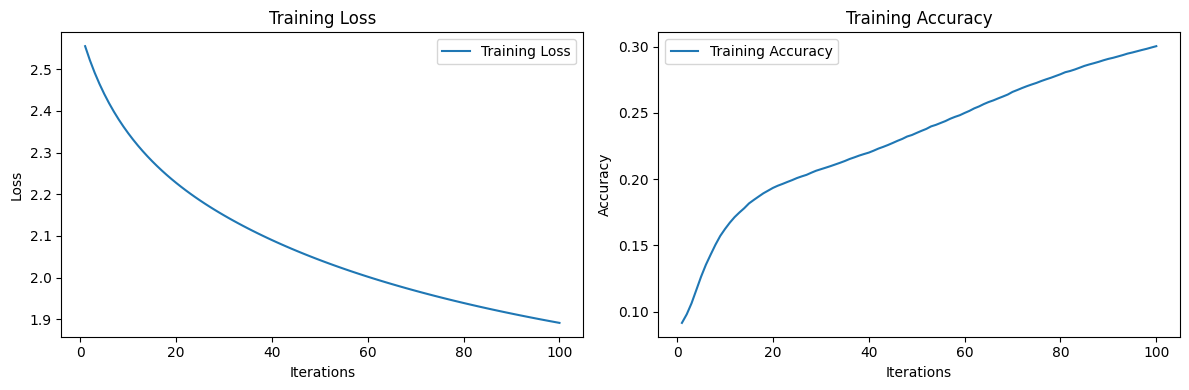

Accuracy: 0.3039
10/100: loss = 2.35 | accuracy = 0.217
20/100: loss = 2.091 | accuracy = 0.289
30/100: loss = 1.937 | accuracy = 0.35
40/100: loss = 1.825 | accuracy = 0.404
50/100: loss = 1.735 | accuracy = 0.445
60/100: loss = 1.66 | accuracy = 0.48
70/100: loss = 1.595 | accuracy = 0.51
80/100: loss = 1.538 | accuracy = 0.534
90/100: loss = 1.486 | accuracy = 0.554
100/100: loss = 1.439 | accuracy = 0.571


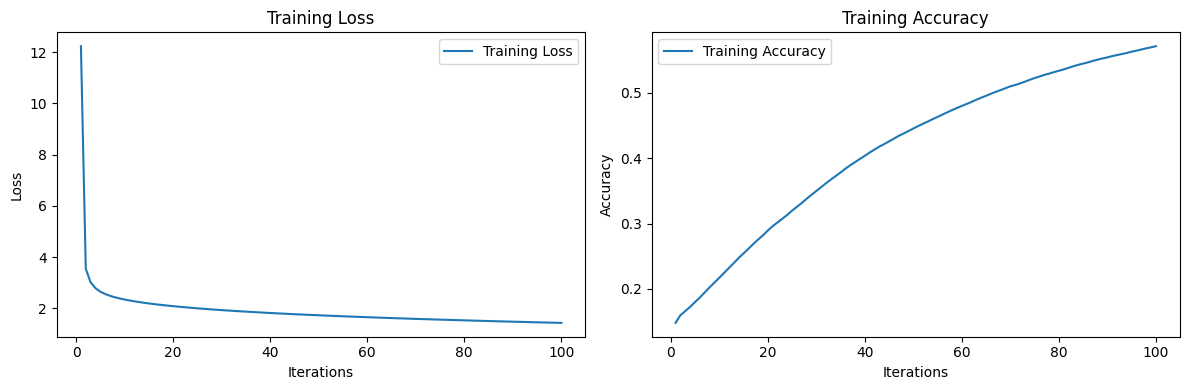

Accuracy: 0.5666


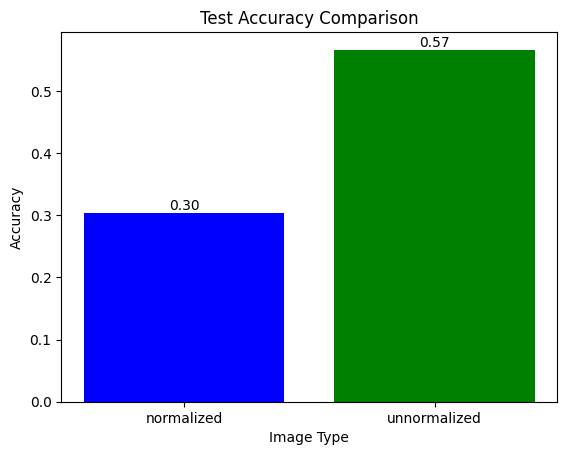

In [ ]:
# Experiment 5
accuracies = []
mlp_normalized = MLP('leaky_relu', 'kaiming', num_hidden_layers=2, num_units=[128, 128])
mlp_normalized.fit(X_train_mnist, y_train_mnist, batch_size=32, learning_rate=0.000001, num_iterations=100)
y_pred_normalized = mlp_normalized.predict(X_test_mnist)
accuracy_normalized = mlp_normalized.evaluate_acc(y_pred_normalized, y_test_mnist)
accuracies.append(accuracy_normalized)

mlp_unnormalized = MLP('leaky_relu', 'kaiming', num_hidden_layers=2, num_units=[128, 128])
mlp_unnormalized.fit(X_train_mnist_unnormalized, y_train_mnist_unnormalized, batch_size=32, learning_rate=0.000001, num_iterations=100)
y_pred_unnormalized = mlp_unnormalized.predict(X_test_mnist_unnormalized)
accuracy_unnormalized = mlp_unnormalized.evaluate_acc(y_pred_unnormalized, y_test_mnist_unnormalized)
accuracies.append(accuracy_unnormalized)
plt.bar(['normalized', 'unnormalized'], accuracies, color=['blue','green'])
plt.xlabel("Image Type")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
plt.show()

In [ ]:
import numpy as np
# Create an MLP instance
mlp = MLP(depth=3, input_size=28*28, hidden_size=64, output_size=10, function="hyperbolic")



print(fashion_data_train.data.shape)
print(cifar_data_train.data.shape)





traing = []
targets =[]
for batch_idx, (images, labels) in enumerate(fashion_data_train_load):
    traing.append(images)
    targets.append(labels)
images, labels = next(iter(fashion_data_train_load)) # flattened the tensor, so its a 1d vector instead of a 2d vector
#images = images.view(-1, 28*28)


mlp.fit(images, labels, 64)

print(images)
print(images.size())
print(labels)

#images, labels = next(iter(cifar_data_train_load)) # flattened the tensor, so its a 1d vector instead of a 2d vector
#images = images.view(-1, 28*28)



print(images)
print(images.size())
print(labels)



print(images)
print(images.size())
print(labels)


print(fashion_data_train.data.shape)
print(cifar_data_train.data.shape)



# TRYING A DIFFERENT METHOD TO GET DATA ,
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
#trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
trainy = to_categorical(trainy)

print(trainX)
testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(np.vstack(trainX))
new_array = []

for image in trainX:
  flattened_matrices = trainX.reshape(trainX.shape[0], -1)

  new_array.append(flattened_matrices)
print(new_array)

#images, labels = next(iter(cifar_data_train_load)) # flattened the tensor, so its a 1d vector instead of a 2d vector
#images = images.view(-1, 28*28)




# mlp.predict()

# mlp.predict()

In [ ]:

# Experiment 6
# we are allowed to use pytorch

import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self, channels=1, middle_layer= 6400):
    super(CNN, self).__init__()

    # First 2D convolutional layer, taking in 1 input channel (image),
    # outputting 32 convolutional features, with a square kernel size of 3
    self.conv1 = nn.Conv2d(channels, 6, 5) ### CHANGED FOR EXPERIMENT 7 ################################
    # Second 2D convolutional layer, taking in the 32 input layers,
    # outputting 64 convolutional features, with a square kernel size of 3
    self.conv2 = nn.Conv2d(6, 16, 5)

    self.fc1 = nn.Linear(middle_layer  , 128)
    self.fc2 = nn.Linear (128, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)

    x = self.conv2(x)
    x = F.relu(x)
    x = torch.flatten(x, 1) # flatten all dimensions except batch

    x = self.fc1(x)
    x = F.relu(x)

    x = self.fc2(x)
    x = F.relu(x)

    #output = F.log_softmax(x, dim=1)
    #output = F.log_softmax(x, dim=3)
    return x


net = CNN()
trainloader = fashion_data_train_load



import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


losses = []
# TRAINING THE NETWORK
for epoch in range(25):  # loop over the dataset multiple times

    epoch_loss = []

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        #images = images.view(-1, 28*28)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        #running_loss += loss.item()
        if batch_idx % 500 == 0:
          print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
        epoch_loss.append(loss.item())
    losses.append(np.mean(epoch_loss))



print('Finished Training')
print(epoch_loss)

# EXPERIMENT 8



Epoch: 1, Loss: 2.3130
Epoch: 1, Loss: 1.3613
Epoch: 1, Loss: 1.2094
Epoch: 1, Loss: 1.0753
Epoch: 2, Loss: 1.0890
Epoch: 2, Loss: 0.9842
Epoch: 2, Loss: 0.7863
Epoch: 2, Loss: 0.3268
Epoch: 3, Loss: 0.4161
Epoch: 3, Loss: 0.3995
Epoch: 3, Loss: 0.6861
Epoch: 3, Loss: 0.1957
Epoch: 4, Loss: 0.3721
Epoch: 4, Loss: 0.4833
Epoch: 4, Loss: 0.2565
Epoch: 4, Loss: 0.1618
Epoch: 5, Loss: 0.1874
Epoch: 5, Loss: 0.1307
Epoch: 5, Loss: 0.2229
Epoch: 5, Loss: 0.1313
Epoch: 6, Loss: 0.6951
Epoch: 6, Loss: 0.1950
Epoch: 6, Loss: 0.2197
Epoch: 6, Loss: 0.3097
Epoch: 7, Loss: 0.3377
Epoch: 7, Loss: 0.2124
Epoch: 7, Loss: 0.4013
Epoch: 7, Loss: 0.3229
Epoch: 8, Loss: 0.0820
Epoch: 8, Loss: 0.1472
Epoch: 8, Loss: 0.3435
Epoch: 8, Loss: 0.1358
Epoch: 9, Loss: 0.4247
Epoch: 9, Loss: 0.2073
Epoch: 9, Loss: 0.1748
Epoch: 9, Loss: 0.3958
Epoch: 10, Loss: 0.0841
Epoch: 10, Loss: 0.2353
Epoch: 10, Loss: 0.3185
Epoch: 10, Loss: 0.0771
Epoch: 11, Loss: 0.0746
Epoch: 11, Loss: 0.1907
Epoch: 11, Loss: 0.2575
Epoc

In [ ]:
# Experiment 6 - CNN Model Accuracy

fashion_testloader = fashion_data_test_load
fashion_accuracy_list = []

correct = 0
total = 0
with torch.no_grad():
  for images, labels in fashion_testloader:
      images, labels = images.to(device), labels.to(device)

      #images = images.view(-1, 28*28)

      outputs = net(images)
      _, predicted = torch.max(outputs.data, dim=1)

      correct += (predicted == labels).sum().item()
      total += labels.size(0)
fashion_accuracy_list.append((100 * correct / total))

print(f"CNN on Fashion - Test Accuracy: {(100 * correct / total)} %%")

CNN on Fashion - Test Accuracy: 97.78 %%


[0.923978815317154, 0.650948555068175, 0.5962610741774241, 0.4649023763100306, 0.33059511158267657, 0.30293213868737223, 0.28298686185479166, 0.2671110122203827, 0.2519527135094007, 0.23909377802908421, 0.2264217848956585, 0.2163409575790167, 0.2044514593253533, 0.19494517402922112, 0.18431079556991656, 0.17603850867400567, 0.16495646390567223, 0.1577033787190914, 0.14649814320256313, 0.13781911109983921, 0.13009598852247, 0.12109719520223637, 0.11394990185151498, 0.10618627275694162, 0.097735724061355]
[0.09923786669969559, 0.07051631063222885, 0.20974163711071014, 0.0826013833284378, 0.05373809114098549, 0.05982131510972977, 0.05420415848493576, 0.06938708573579788, 0.0752110630273819, 0.22855322062969208, 0.031148288398981094, 0.08084779977798462, 0.056624509394168854, 0.024766383692622185, 0.10095085948705673, 0.1733391284942627, 0.011814791709184647, 0.10217294842004776, 0.050787992775440216, 0.06197125092148781, 0.03864062950015068, 0.10056062787771225, 0.06384990364313126, 0.033

Text(0, 0.5, 'loss')

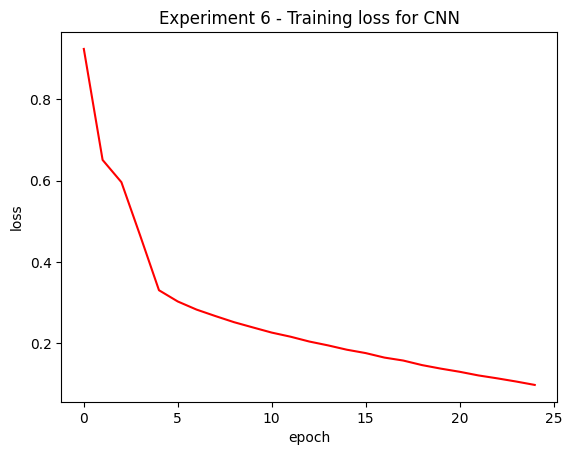

In [ ]:
# Experiment 6 - CNN Training Loss

print(losses)

print(epoch_loss)

plt.plot(np.arange(len(losses)), losses, 'r')
plt.title('Experiment 6 - Training loss for CNN')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
# Experiment 7 - CNN for CIFAR10

import torch.optim as optim
criterion = nn.CrossEntropyLoss()

net = CNN(channels=3, middle_layer= 9216)
trainloader = cifar_data_train_load



optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


cifar_losses = []
# TRAINING THE NETWORK
for epoch in range(25):  # loop over the dataset multiple times

    epoch_loss = []

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        #images = images.view(-1, 28*28)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        #running_loss += loss.item()
        if batch_idx % 500 == 0:
          print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
        epoch_loss.append(loss.item())
    cifar_losses.append(np.mean(epoch_loss))



print('Finished Training')
print(epoch_loss)

Epoch: 1, Loss: 2.3068
Epoch: 1, Loss: 2.2914
Epoch: 1, Loss: 2.2972
Epoch: 1, Loss: 2.2689
Epoch: 2, Loss: 2.2513
Epoch: 2, Loss: 2.2349
Epoch: 2, Loss: 2.2505
Epoch: 2, Loss: 2.1191
Epoch: 3, Loss: 2.1375
Epoch: 3, Loss: 2.0946
Epoch: 3, Loss: 1.8303
Epoch: 3, Loss: 1.9060
Epoch: 4, Loss: 1.9479
Epoch: 4, Loss: 1.8892
Epoch: 4, Loss: 2.0148
Epoch: 4, Loss: 1.7257
Epoch: 5, Loss: 1.6667
Epoch: 5, Loss: 1.7740
Epoch: 5, Loss: 1.7708
Epoch: 5, Loss: 1.7805
Epoch: 6, Loss: 2.0068
Epoch: 6, Loss: 1.8533
Epoch: 6, Loss: 1.8265
Epoch: 6, Loss: 1.9216
Epoch: 7, Loss: 1.7908
Epoch: 7, Loss: 1.7983
Epoch: 7, Loss: 1.6132
Epoch: 7, Loss: 1.6743
Epoch: 8, Loss: 1.6109
Epoch: 8, Loss: 1.2431
Epoch: 8, Loss: 1.3426
Epoch: 8, Loss: 1.5087
Epoch: 9, Loss: 1.4171
Epoch: 9, Loss: 1.6408
Epoch: 9, Loss: 1.8283
Epoch: 9, Loss: 1.6158
Epoch: 10, Loss: 1.2337
Epoch: 10, Loss: 1.3743
Epoch: 10, Loss: 1.4193
Epoch: 10, Loss: 1.4823
Epoch: 11, Loss: 1.3257
Epoch: 11, Loss: 1.3861
Epoch: 11, Loss: 1.3294
Epoc

[2.293966652869568, 2.2186906663408967, 2.0158348387811555, 1.9278134567495042, 1.8427096125565503, 1.7095017206645973, 1.605894296274533, 1.5486162043655063, 1.4992475069186966, 1.4534723820857185, 1.4181565431852945, 1.3904947198436417, 1.366880261356527, 1.346773365980833, 1.3279496504950814, 1.310001001095665, 1.2934749814766917, 1.2766749523270229, 1.2600874938571294, 1.2449751310980022, 1.2289652783979, 1.2137159515632243, 1.1981743346477882, 1.1851731648219372, 1.1688656853851567]
[1.2867515087127686, 1.4117913246154785, 1.435654640197754, 1.060943841934204, 1.2493773698806763, 1.3735312223434448, 1.4145232439041138, 0.9447563886642456, 0.9706318378448486, 1.663904070854187, 1.0951110124588013, 0.9991002082824707, 1.394119143486023, 0.934930682182312, 1.4475486278533936, 1.2157171964645386, 1.1014028787612915, 1.2040692567825317, 0.9575936794281006, 0.8396403789520264, 1.373050332069397, 1.3590487241744995, 0.9080982804298401, 1.33017897605896, 1.2313573360443115, 1.626104593276

Text(0, 0.5, 'loss')

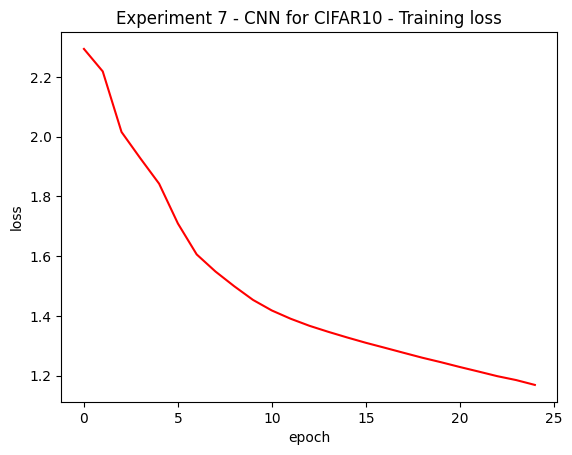

In [ ]:
print(cifar_losses)

print(epoch_loss)

plt.plot(np.arange(len(cifar_losses)), cifar_losses, 'r')
plt.title('Experiment 7 - CNN for CIFAR10 - Training loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
# Experiment 7 - MLP MODEL ACCURACY

mlp.fit(X_train_cifar, y_train_cifar, learning_rate=0.1, batch_size=32, num_iterations=100)

y_pred_cifar = mlp.predict(X_test_cifar)
mlp.evaluate_acc(y_pred_cifar, y_test_cifar)



In [ ]:
# EXPERIMENT 8 - MOMENTUMN Variation

import torch.optim as optim
criterion = nn.CrossEntropyLoss()

net = CNN(channels=3, middle_layer= 9216)
trainloader = cifar_data_train_load
testloader = cifar_data_test_load



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


test_parameter = 0
momentum_list = []
accuracy_list = []
result_list = []
while test_parameter < 1:
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=test_parameter)

  cifar_losses = []
  # TRAINING THE NETWORK
  for epoch in range(10):  # loop over the dataset multiple times

      epoch_loss = []

      running_loss = 0.0
      for batch_idx, (inputs, labels) in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = inputs.to(device), labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()
          #images = images.view(-1, 28*28)
          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          #running_loss += loss.item()
          if batch_idx % 500 == 0:
            print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
          epoch_loss.append(loss.item())
      cifar_losses.append(np.mean(epoch_loss))
  test_parameter += 0.2
  result_list.append(cifar_losses)
  momentum_list.append(test_parameter)

  correct = 0
  total = 0

  with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        #images = images.view(-1, 28*28)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, dim=1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)
  accuracy_list.append((100 * correct / total))

  print(f"Test Accuracy: {(100 * correct / total)} %%")

print('Finished Training')
print(epoch_loss)

Epoch: 1, Loss: 2.3002
Epoch: 1, Loss: 2.3077
Epoch: 1, Loss: 2.2975
Epoch: 1, Loss: 2.2502
Epoch: 2, Loss: 2.2259
Epoch: 2, Loss: 2.1502
Epoch: 2, Loss: 2.2598
Epoch: 2, Loss: 2.1694
Epoch: 3, Loss: 2.1003
Epoch: 3, Loss: 1.9470
Epoch: 3, Loss: 2.0333
Epoch: 3, Loss: 2.0387
Epoch: 4, Loss: 1.9741
Epoch: 4, Loss: 2.1210
Epoch: 4, Loss: 1.9294
Epoch: 4, Loss: 2.1073
Epoch: 5, Loss: 1.7863
Epoch: 5, Loss: 1.8951
Epoch: 5, Loss: 1.8360
Epoch: 5, Loss: 1.8081
Epoch: 6, Loss: 2.1006
Epoch: 6, Loss: 1.5996
Epoch: 6, Loss: 2.0512
Epoch: 6, Loss: 1.8457
Epoch: 7, Loss: 1.7506
Epoch: 7, Loss: 1.6313
Epoch: 7, Loss: 1.6962
Epoch: 7, Loss: 1.9213
Epoch: 8, Loss: 1.9194
Epoch: 8, Loss: 2.0773
Epoch: 8, Loss: 1.6228
Epoch: 8, Loss: 1.9348
Epoch: 9, Loss: 1.8915
Epoch: 9, Loss: 1.7078
Epoch: 9, Loss: 1.8244
Epoch: 9, Loss: 1.6528
Epoch: 10, Loss: 1.7768
Epoch: 10, Loss: 1.5164
Epoch: 10, Loss: 1.7182
Epoch: 10, Loss: 1.5492
Test Accuracy: 43.74 %%
Epoch: 1, Loss: 1.7738
Epoch: 1, Loss: 1.5760
Epoch:

In [ ]:
mlp.fit(X_train_cifar, y_train_cifar, learning_rate=0.1, batch_size=32, num_iterations=100)

Test Accuracy: 46.14 %%


[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]


Text(0, 0.5, 'loss')

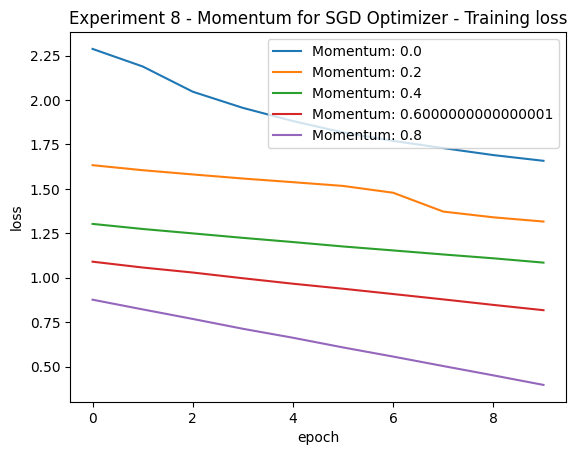

In [ ]:
# Experiment 8 - Momentum for SGD OPTIMIZER
for i in range (len(momentum_list)):
  plt.plot(np.arange(len(cifar_losses)), result_list[i],  label = "Momentum: " + str(0.2 * i))

print(momentum_list)

plt.title('Experiment 8 - Momentum for SGD Optimizer - Training loss')
plt.legend()

plt.xlabel('epoch')
plt.ylabel('loss')

Model using Momentum 0.0 has an accuracy score of: 43.74
Model using Momentum 0.2 has an accuracy score of: 52.44
Model using Momentum 0.4 has an accuracy score of: 56.88
Model using Momentum 0.6000000000000001 has an accuracy score of: 59.19
Model using Momentum 0.8 has an accuracy score of: 59.23
[43.74, 52.44, 56.88, 59.19, 59.23]


Text(0, 0.5, 'accuracy')

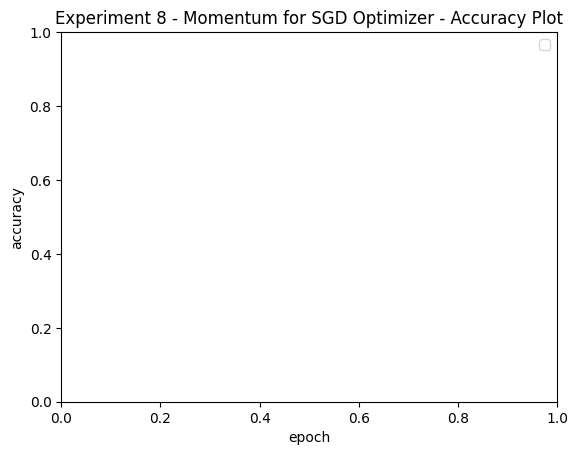

In [ ]:
for i in range (len(accuracy_list)):
  print("Model using Momentum " + str(0.2 * i) + " has an accuracy score of: " + str(accuracy_list[i]))
# DATA FOR ACCURACY


print(accuracy_list)

plt.title('Experiment 8 - Momentum for SGD Optimizer - Accuracy Plot')
plt.legend()

plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
# EXPERIMENT 8 - ADAM getting the training loss and the accuracy score

import torch.optim as optim
criterion = nn.CrossEntropyLoss()

net = CNN(channels=3, middle_layer= 9216)
trainloader = cifar_data_train_load


testloader = cifar_data_test_load



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)


optimizer = optim.Adam(net.parameters(), lr=0.001)

adam_cifar_losses = []
# TRAINING THE NETWORK
for epoch in range(10):  # loop over the dataset multiple times

    epoch_loss = []

    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        #images = images.view(-1, 28*28)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        #running_loss += loss.item()
        if batch_idx % 500 == 0:
          print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
        epoch_loss.append(loss.item())
    adam_cifar_losses.append(np.mean(epoch_loss))



print('Finished Training')
print(epoch_loss)
print('Finished Training')
print(epoch_loss)

[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]


Text(0, 0.5, 'loss')

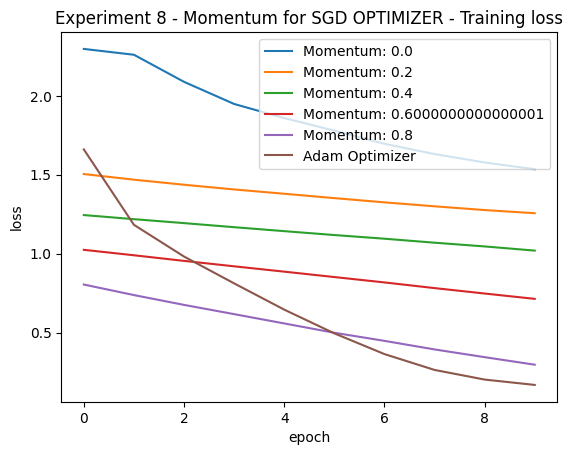

In [ ]:
# Experiment 8 - Momentum for SGD OPTIMIZER
for i in range (len(momentum_list)):
  plt.plot(np.arange(len(cifar_losses)), result_list[i],  label = "Momentum: " + str(0.2 * i))

print(momentum_list)
plt.plot(np.arange(len(adam_cifar_losses)), adam_cifar_losses, label = "Adam Optimizer")

plt.title('Experiment 8 - Momentum for SGD OPTIMIZER - Training loss')
plt.legend()


plt.xlabel('epoch')
plt.ylabel('loss')